<a href="https://colab.research.google.com/github/mukeshml/Traffic-Management-AI/blob/main/Satellite_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing all important libraries**

In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!ls -lah "/content/drive/MyDrive/Semantic Segmentation/Semantic segmentation dataset"

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 1'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 2'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 3'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 4'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 5'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 6'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 7'
drwx------ 4 root root 4.0K Dec 14 09:43 'Tile 8'


In [9]:
import os
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [10]:
dataset_name= "Satalleite Dataset"
dataset_folder = '/content/drive/MyDrive/Semantic Segmentation/Semantic segmentation dataset'

In [11]:
for path, subdirs, files in os.walk(dataset_folder):
  dir_name= path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name =='images':
    images = os.listdir(path)
    print(images)

['image_part_004.jpg', 'image_part_007.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_001.jpg', 'image_part_008.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_009.jpg']
['image_part_006.jpg', 'image_part_005.jpg', 'image_part_003.jpg', 'image_part_001.jpg', 'image_part_002.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_007.jpg', 'image_part_009.jpg']
['image_part_004.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_007.jpg', 'image_part_003.jpg', 'image_part_008.jpg', 'image_part_006.jpg', 'image_part_009.jpg', 'image_part_001.jpg']
['image_part_003.jpg', 'image_part_008.jpg', 'image_part_009.jpg', 'image_part_007.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_001.jpg', 'image_part_002.jpg', 'image_part_004.jpg']
['image_part_001.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_008.jpg', 'image_part_007.jpg', 'image_part_009.jpg', 'image_part_003.jpg', 'image_part_006.jpg', 'image_part_002.jpg']
['ima

In [12]:
image = cv2.imread(f'{dataset_folder}/Tile 2/images/image_part_001.jpg',1)

In [13]:
image_patch_size= 256

In [14]:
image.shape

(544, 509, 3)

In [15]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [16]:
len(image_patches)

2

In [17]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [18]:
minmax_scaler = MinMaxScaler()

In [19]:
image_x = image_patches[0,0,:,:]
image_y= minmax_scaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [20]:
image_y[0].shape

(256, 256, 3)

In [21]:
image.shape

(544, 509, 3)

In [22]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [23]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmax_scaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [24]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [25]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [26]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

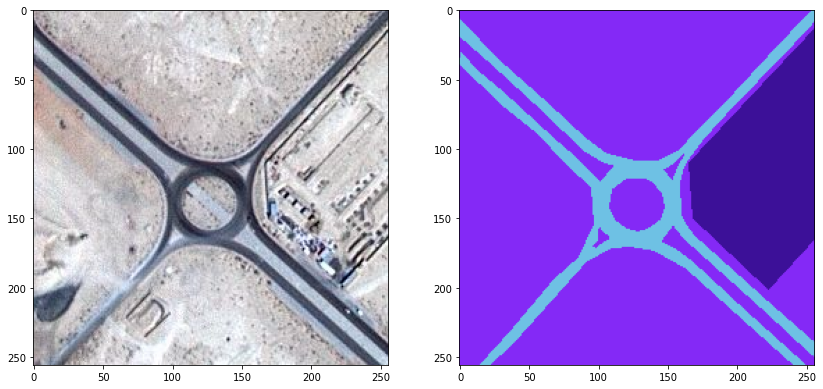

In [27]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [28]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [29]:
label = individual_patched_mask

In [30]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [31]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [32]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [33]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [34]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


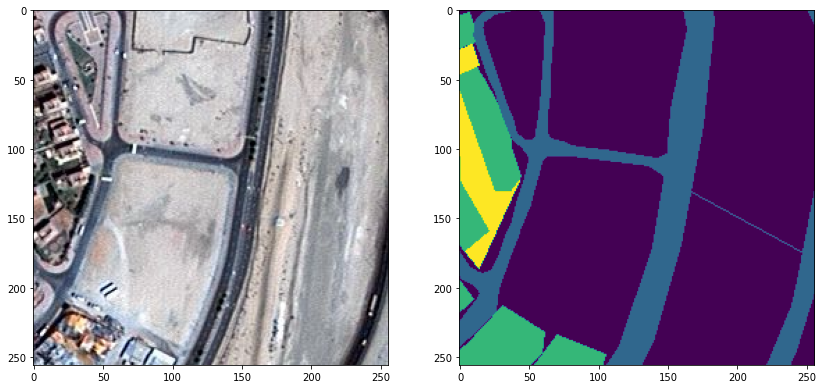

In [35]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [36]:
total_classes = len(np.unique(labels))

In [37]:
from tensorflow.keras.utils import to_categorical 

In [38]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [39]:
master_trianing_dataset = image_dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [43]:



image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [44]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


**Part 2**

In [45]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda
from keras import backend as K

In [46]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [47]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [48]:
metrics = ["accuracy", jaccard_coef]
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [49]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [50]:
model = get_deep_learning_model()

**Generating Loss Function**
**dice loss > Focal Loss > Total Loss **
Total Loss = (Dice loss + (1*Focal Loss)) **bold text**

In [51]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [52]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [54]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [55]:
focal_loss = sm.losses.CategoricalFocalLoss()


In [56]:
total_loss = dice_loss + (1 * focal_loss)

**MOdel Compilation**

In [57]:
import tensorflow as tf

In [58]:
tf.keras.backend.clear_session()


In [59]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             